# PHYSICS 334 Assignment 3 2018

This assignment should be handed in via upload of your python notebook, containing numbered answers to tne questions handed out on the Assignment sheet, to Canvas before 12 noon on Wednesday 25 April.

In this assignment, we are going to use several python scripts that are available from the authors of the well known book, "Computer Simulation of Liquids" by M. P. Allen and D. Tildesley, originally published by Oxford University Press in 1987. They demonstrate many key algorithms that are foundational to simulation of periodic systems, and have been rereleased in python form for the 2nd edition of the book, which came out in August 2017.

The Python code from Allen & Tildesley is great, but it has a few quirks. One is that, since it has been adapted from Fortran, it is a bit funny about how you give it inputs. We will need to write an input file for each piece of code to read in.

As you go through the cells in the notebook below, you will need to run the code (shift-return will do this). You should add markdown text (like this text!) in a cell above the code to explain any changes you have made; you should add markdown text in a cell following the code to discuss the results and answer the assignment questions.

# Question 1

To create a physical system of atoms for your simulation, you will first work with the code 'initialize.py'.

To begin with, we will simulate 'Lennard-Jones atoms', which are defined such that the energy scale of the potential describing the interaction between the atoms is normalised to 1. Later, by changing the parameters of the potential, we will be able to change our simulation to mimic a given physical system.

First we write the input file that *initialize.py* will use. We want it to give us an initial configuration with both positions and velocities. (It sets up a configuration for 256 atoms by default.) 

In [68]:
with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true}')

You want to run initialize.py with input "velocities":true, to create velocity information for each atom which reflects the temperature.  To do this we put this information in an input file 'input.inp' which the code reads. This runs the code with no 'new' input, just using the default information.  

Run *initialize.py*. It will output a file called cnf.inp

If you look at cnf.inp in your library you will see it contains '256' and '6.988...' on the first two lines, for the number of atoms and the box length. Then there are 256 lines containing six numbers - these are the x,y,z coordinates of each atom, followed by the x,y,z components of the velocities of each atom.  These are randomly generated to give a distribution that equates to a given temperature (by default, T = 1.0 in Lennard Jones units).

So your configuration file will contain the positions and velocities of 256 atoms in a FCC lattice, with reduced density = 0.75 and reduced temperature T = 1.0, and we can use this for a MC simulation.


In [12]:
%run initialize

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    4
n                                                   256
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     6.988644
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp


Next we need to write an input file with some parameters for *mc_nvt_lj.py*. We might start by specifying a simulation that uses 10 blocks, each of 100 steps, for an unscaled temperature (temperature = 1 unit of T).

In [78]:
with open("run_input.inp",'w') as run_file:
    #run_file.write('{}')
    run_file.write('{ "nblock":10, "nstep":100, "temperature":0.1 }')

This version of *mc_nvt_lj.py* reads in the input file produced above. Time to run it...

In [70]:
%run mc_nvt_lj

mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                           100  
Specified temperature                          0.050000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 864  
Box length                                    10.482966
Density                                        0.750000
Initial values
E/N cut                                       -5.783403
P cut                                         -6.172051
E/N full                                      -6.184978
P full                                        -6.473232
T config                                       0.000000

Run begins
Date:                      

KeyboardInterrupt: 

Looking at the output, we see several things. Each block of the simulation reports thermodynamic quantities, such as E/N, and these are averaged at the end over all blocks.  Both E/N and P are calculated first with a truncated LJ potential (cut) and an extended version (full).  You should work with the 'full' results.

Now I would like you to test how the calculated energies change depending on the number of steps, and number of blocks used.  

Recalculate, as above, increasing the number of blocks and number of steps systematically until you can demonstrate that the energy per atom has converged to two decimal places, in reduced units.  To do this, please plot E/N against the number of steps multiplied by the number of blocks (the total number of steps).  Does it make a difference whether you have more or fewer blocks, for a given total number of steps? Discuss your results.

A piece of python code that you can use to plot xy data is below - modify this to demonstrate the convergence of the energy that you find.

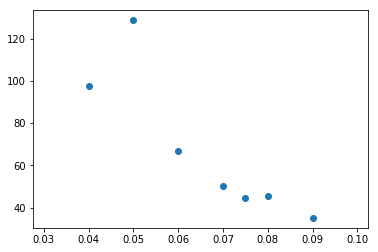

In [100]:
import matplotlib.pyplot as plt

"""
X100 = [1000, 2000, 4000, 5000]
X200 = [2000, 4000, 8000, 1000]
X400 = [4000, 8000, 16000, 20000]

Y100 = [-3.808581, -3.777373, -3.697588, -3.704590]
Y200 = [-3.742359, -3.769115, -3.721288, -3.704590]
Y400 = [-3.740558, -3.680379, -3.697889, -3.726314]

plt.scatter(X100, Y100, color="blue")
plt.scatter(X200, Y200, color="red")
plt.scatter(X400, Y400, color="black")
plt.show()
"""

"""
#E/N vs T
X = [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.095, 0.1, 0.105, 0.15, 0.2, 0.3, 0.4, 0.5, 1.0]
Y = [-6.850673, -6.651545, -6.534933, -6.776956, -6.782561, -6.651545, -6.523073, -4.954443, -6.480627, -6.566037, -6.216902, -6.018334, -5.458770, -4.954443, -3.847297]

plt.scatter(X,Y)
plt.show()
"""

"""
#cv/N vs T
X = [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.095, 0.1, 0.105, 0.15, 0.2, 0.3, 0.4, 0.5, 1.0]
Y = [118.37814839999996, 24.104603, 20.39838, 43.94532679999999, 43.8252774, 24.104603, 14.8018936, 2.5710831, 10.6778738, 10.894380199999999, 4.8377365, 3.5658492, 2.9207158, 2.5710831, 2.5159109]

plt.scatter(X,Y)
plt.show()
"""

X = [0.04, 0.05, 0.06, 0.07, 0.075, 0.08, 0.09]
Y = [97.790956, 128.671565, 66.722163, 50.148878, 44.757918, 45.523598, 35.130807]
plt.scatter(X,Y)
plt.show()

## Question 2

Plot E/N vs T for ten temperatures from 0.01 to 1.0 - and discuss!

## Question 3

Modify the code below, as needed.

In [79]:
with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true,"nc":6}')

In [80]:
%run initialize

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    6
n                                                   864
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                    10.482966
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp


In [ ]:
%run mc_nvt_lj

mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                           100  
Specified temperature                          0.100000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 864  
Box length                                    10.482966
Density                                        0.750000
Initial values
E/N cut                                       -5.708403
P cut                                         -6.134551
E/N full                                      -6.109978
P full                                        -6.435732
T config                                       0.000000

Run begins
Date:                      

## Question 4

Now find the temperature at which this new system melts!

## Question 5

How do we make the potential fit a particular type of atom? Use the parameters given in the assignment question.